# A lot has been happening on the crypto market, I decided to carry out a sentiment analysis on crypto headlines using python

The cryptocurrency sentiment analysis reflects the ongoing saga of an ever-evolving market. It highlights the importance of understanding and harnessing the power of sentiment in an ecosystem that constantly fluctuates between exuberance and resilience. Sentiment analysis remains an invaluable compass, guiding investors, traders, and industry professionals through the unpredictable twists and turns of the crypto landscape.

In this concise yet informative data science project, we delve into sentiment analysis of the crypto market using Natural Language Processing (NLP). By analyzing news articles from 10/12/2021 to 11/12/2022 (I can't lay my hands on source of of data, but was downloaded from kaggle), we uncover new developments related to the crypto market. This analysis focuses on the most common keywords, sentiment distribution (negative/positive/neutral), and utilizes Named Entity Recognition (NER) with Spacy. Through visualizations and key findings, we explore the impact of emotional tone on market fluctuations, enabling traders to potentially capitalize on opportunities. <b>However, it is important to note that sentiment analysis is not foolproof and can be influenced by various factors.</b>

This sentiment analysis emphasizes the significance of sentiment analysis in understanding the emotional tone of the crypto market and identifying potential trading advantages. However, it is crucial to remember that sentiment analysis is not infallible and can be influenced by factors such as media bias and external events. Furthermore, our project showcases the power of NLP techniques, such as keyword extraction and named entity recognition, in extracting valuable insights from textual data.

If I am pro trader, I will watch out for the months of March, April, May but again pay more attention to November and December. This sentiment analysis is basically done for educational pursposes. 

In [1]:
# Import all packages
import pandas as pd
import numpy as np

from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns 

In [2]:
df = pd.read_csv("crypto/crypto_news.csv")
#df= df.set_index(pd.DatetimeIndex(df['date'].values))

df.head()

,date,source,subject,text,headline,link
0,11/15/2022 11:00,CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...
1,11/15/2022 10:55,CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...
2,11/15/2022 10:32,CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...
3,11/15/2022 9:56,CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...
4,11/15/2022 9:46,CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12750 entries, 0 to 12749
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      12750 non-null  object
 1   source    12750 non-null  object
 2   subject   12750 non-null  object
 3   text      12750 non-null  object
 4   headline  12750 non-null  object
 5   link      12750 non-null  object
dtypes: object(6)
memory usage: 597.8+ KB


In [4]:
# Extract The month from the date
df['date'] = pd.to_datetime(df['date'])
df['month']= df['date'].dt.month

df.head()

,date,source,subject,text,headline,link,month
0,2022-11-15 11:00:00,CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...,11
1,2022-11-15 10:55:00,CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...,11
2,2022-11-15 10:32:00,CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...,11
3,2022-11-15 09:56:00,CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...,11
4,2022-11-15 09:46:00,CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...,11


In [5]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [6]:
def data_cleaning(text):
    text = text.lower()
    text = re.sub(r'https\S+|www\S+https\S+', '', text, flags=re.MULTILINE) #remove links/url
    text = re.sub(r'@w+|\#','',text) #remove hashtags and special symbols
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n','',text)
    text = re.sub('RT[\s]+', '', text)


    # lets remove stop words 

    text_token = word_tokenize(text)
    filtered_text =[content for content in text_token if not content in stop_words]
    return ' '.join(filtered_text)


In [7]:
# Let's apply processed data to the text

df['clean_text'] = df['text'].apply(data_cleaning)
df.head()

,date,source,subject,text,headline,link,month,clean_text
0,2022-11-15 11:00:00,CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...,11,roster full entertainment industry notables ae...
1,2022-11-15 10:55:00,CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...,11,blockchain analytics firm nansen released over...
2,2022-11-15 10:32:00,CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...,11,hardware wallet firm certain latest uptick dem...
3,2022-11-15 09:56:00,CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...,11,kyle davies founder collapsed crypto fund thre...
4,2022-11-15 09:46:00,CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...,11,despite ongoing crypto market downturn intensi...


In [8]:
# Let's compare the cleaned text with the original text
df[['text', 'clean_text']]

,text,clean_text
0,With a roster full of entertainment industry n...,roster full entertainment industry notables ae...
1,Blockchain analytics firm Nansen has released ...,blockchain analytics firm nansen released over...
2,The hardware wallet firm is certain that the l...,hardware wallet firm certain latest uptick dem...
3,"Kyle Davies, founder of the collapsed crypto f...",kyle davies founder collapsed crypto fund thre...
4,Despite the ongoing crypto market downturn whi...,despite ongoing crypto market downturn intensi...
...,...,...
12745,Cream Finance (CREAM) suffered another flash l...,cream finance cream suffered another flash loa...
12746,Banque de France disclosed the results of its ...,banque de france disclosed results experimenta...
12747,Advancing its project to become \x9caÂ\xa0meta...,advancing project become x9caâxa0metaverseâxa0...
12748,Chinese companies are still topping the blockc...,chinese companies still topping blockchain pat...


In [9]:
# I decided to use Stemmer to remove suffixs
stemmer = PorterStemmer()
def stemming(data):
    clean_text = [stemmer.stem(word) for word in data]
    return data

In [10]:
df['clean_text'] = df['clean_text'].apply(lambda x: stemming(x))

In [11]:
# create a function to get the polarity
def get_polarity(clean_text):
    return TextBlob(clean_text).sentiment.polarity

#create a new column called 'Polarity
df['polarity'] = df['clean_text'].apply(get_polarity)
df.head()

,date,source,subject,text,headline,link,month,clean_text,polarity
0,2022-11-15 11:00:00,CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...,11,roster full entertainment industry notables ae...,0.175000
1,2022-11-15 10:55:00,CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...,11,blockchain analytics firm nansen released over...,-0.068750
2,2022-11-15 10:32:00,CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...,11,hardware wallet firm certain latest uptick dem...,0.049405
3,2022-11-15 09:56:00,CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...,11,kyle davies founder collapsed crypto fund thre...,0.000000
4,2022-11-15 09:46:00,CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...,11,despite ongoing crypto market downturn intensi...,0.127381


In [12]:
df.columns

Index(['date', 'source', 'subject', 'text', 'headline', 'link', 'month',
       'clean_text', 'polarity'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12750 entries, 0 to 12749
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12750 non-null  datetime64[ns]
 1   source      12750 non-null  object        
 2   subject     12750 non-null  object        
 3   text        12750 non-null  object        
 4   headline    12750 non-null  object        
 5   link        12750 non-null  object        
 6   month       12750 non-null  int64         
 7   clean_text  12750 non-null  object        
 8   polarity    12750 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 896.6+ KB


In [14]:
# create a functions to compute negative, neutral and postive sentiments

def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# lets create a new column for sentiment analysis
df['sentiment'] = df['polarity'].apply(get_sentiment)

df.head()

,date,source,subject,text,headline,link,month,clean_text,polarity,sentiment
0,2022-11-15 11:00:00,CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...,11,roster full entertainment industry notables ae...,0.175000,Positive
1,2022-11-15 10:55:00,CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...,11,blockchain analytics firm nansen released over...,-0.068750,Negative
2,2022-11-15 10:32:00,CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...,11,hardware wallet firm certain latest uptick dem...,0.049405,Positive
3,2022-11-15 09:56:00,CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...,11,kyle davies founder collapsed crypto fund thre...,0.000000,Neutral
4,2022-11-15 09:46:00,CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...,11,despite ongoing crypto market downturn intensi...,0.127381,Positive


In [15]:
df['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total sentiment')

,Total sentiment
sentiment,
Positive,5220
Neutral,5167
Negative,2363


Text(0.5, 1.0, 'Perception count')

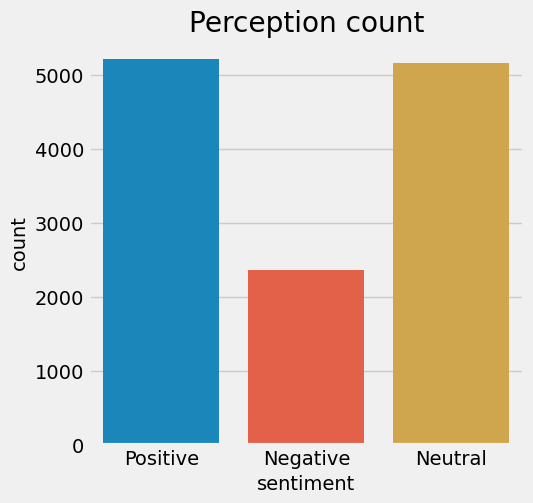

In [16]:
fig = plt.figure(figsize= (5,5))
sns.countplot(x = 'sentiment', data = df)
plt.title('Perception count')

C:\Users\User\Downloads\python-3.8.0.exe\ipykernel_13416\3846022066.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  polarity = df.groupby(['month']).sum()['polarity']


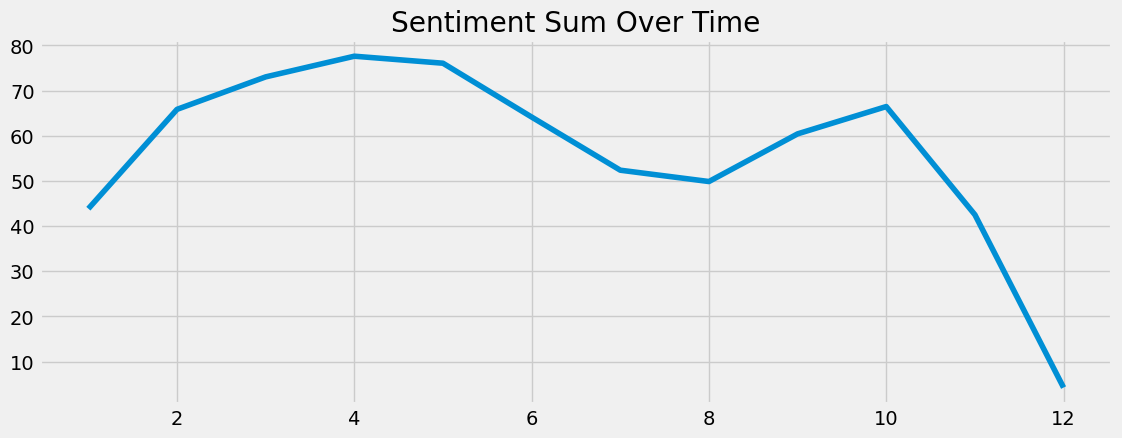

In [17]:
# Plot the sum of the polarity  each date

plt.figure(figsize=(12.33, 4.5))
plt.title ('Sentiment Sum Over Time')
polarity = df.groupby(['month']).sum()['polarity']
plt.plot(polarity. index, polarity)


In [18]:
# show the sum of the polarity for all months in 23 months
polarity

month
1     43.852834
2     65.844821
3     73.031812
4     77.609174
5     76.057612
6     64.141874
7     52.375055
8     49.867664
9     60.418885
10    66.461166
11    42.518552
12     4.257563
Name: polarity, dtype: float64

In [19]:
# Get the count of each article
polarity_count = df.groupby(['month']).count()['polarity']

polarity_count

month
1      704
2     1178
3     1300
4     1240
5     1299
6     1320
7     1174
8     1098
9     1251
10    1227
11     808
12     151
Name: polarity, dtype: int64

In [20]:
# Lets check the average sentiment for each month
polarity_avg = polarity / polarity_count
polarity_avg

month
1     0.062291
2     0.055895
3     0.056178
4     0.062588
5     0.058551
6     0.048592
7     0.044612
8     0.045417
9     0.048296
10    0.054166
11    0.052622
12    0.028196
Name: polarity, dtype: float64

Text(0.5, 1.0, 'Sentiment Average Over Time')

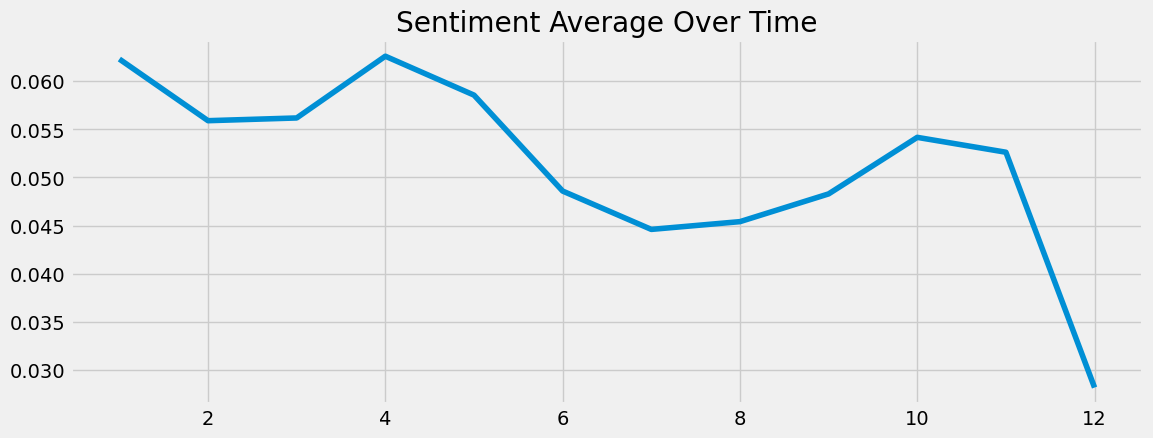

In [21]:
# plot the average sentiment over time
plt.figure(figsize=(12.33, 4.5))
plt.plot(polarity_avg.index, polarity_avg)
plt.title ('Sentiment Average Over Time')


Word Count
- Extract the most common keyword

In [45]:
from collections import Counter
text_count = Counter()
for text in df['clean_text']:
    for word in text.split():
        text_count[word] += 1

list_df = pd.DataFrame.from_dict(text_count, orient = 'index').reset_index()
list_df.columns = ['Words', 'Count']
list_df.sort_values(by = 'Count', ascending = False, inplace = True)

list_df.head(20)

,Words,Count
47,crypto,2643
91,bitcoin,2286
83,price,1538
2729,usd,1090
59,market,1061
212,new,944
309,ethereum,920
327,btc,781
79,could,749
14,blockchain,716


In [47]:
# Check the percent of the word count
list_df['Percentage'] = (list_df['Count']/list_df['Count'].sum()*100)
list_df.head(10)

,Words,Count,Percentage
47,crypto,2643,1.532156
91,bitcoin,2286,1.325202
83,price,1538,0.891584
2729,usd,1090,0.631877
59,market,1061,0.615065
212,new,944,0.547240
309,ethereum,920,0.533327
327,btc,781,0.452748
79,could,749,0.434198
14,blockchain,716,0.415068


In [23]:
pos_text = df[df['sentiment'] == 'Positive']['clean_text']
neg_text = df[df['sentiment'] == 'Negative']['clean_text']
pos_text

0        roster full entertainment industry notables ae...
2        hardware wallet firm certain latest uptick dem...
4        despite ongoing crypto market downturn intensi...
6        hbit seeking legal advice recover digital asse...
8        cryptocurrency prices plummeted amid reports f...
                               ...                        
12737                kda surged higher crypto market month
12742    crypto power broad set sectors including ecomm...
12744    crypto community issued withering response lat...
12746    banque de france disclosed results experimenta...
12747    advancing project become x9caâxa0metaverseâxa0...
Name: clean_text, Length: 5220, dtype: object

In [24]:
pos_tokens = [token for line in pos_text for token in line.split()]
neg_tokens = [token for line in neg_text for token in line.split()]
pos_tokens

['roster',
 'full',
 'entertainment',
 'industry',
 'notables',
 'aether',
 'games',
 'building',
 'may',
 'become',
 'next',
 'definitive',
 'gaming',
 'universe',
 'hardware',
 'wallet',
 'firm',
 'certain',
 'latest',
 'uptick',
 'demand',
 'result',
 'investors',
 'rescuing',
 'funds',
 'aftermath',
 'ftx',
 'failure',
 'despite',
 'ongoing',
 'crypto',
 'market',
 'downturn',
 'intensified',
 'crypto',
 'exchange',
 'ftxs',
 'collapse',
 'many',
 'seasoned',
 'investors',
 'demonstrate',
 'firm',
 'belief',
 'crypto',
 'dallas',
 'mavericks',
 'owner',
 'mark',
 'cuban',
 'declaring',
 'convinced',
 'technologys',
 'utility',
 'related',
 'smart',
 'contracts',
 'could',
 'safeguard',
 'future',
 'hbit',
 'seeking',
 'legal',
 'advice',
 'recover',
 'digital',
 'assets',
 'question',
 'cryptocurrency',
 'prices',
 'plummeted',
 'amid',
 'reports',
 'ftxs',
 'bankruptcy',
 'last',
 'week',
 'precipitous',
 'drop',
 'cryptocurrency',
 'prices',
 'news',
 'broke',
 'ftx',
 'filed',
 

In [25]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [26]:
most_common_pos_text = get_tokens(pos_tokens)
most_common_neg_text = get_tokens(neg_tokens)
most_common_neg_text

{'crypto': 516,
 'bitcoin': 416,
 'price': 317,
 'market': 268,
 'past': 183,
 'btc': 177,
 'firm': 170,
 'could': 145,
 'usd': 137,
 'said': 130,
 'million': 125,
 'nft': 124,
 'ethereum': 123,
 'investors': 122,
 'trading': 120,
 'new': 117,
 'blockchain': 114,
 'us': 107,
 'one': 102,
 'cryptocurrency': 97,
 'may': 95,
 'behind': 95,
 'due': 93,
 'exchange': 89,
 'sec': 89,
 'users': 86,
 'digital': 82,
 'week': 80,
 'hours': 79,
 'traders': 76}

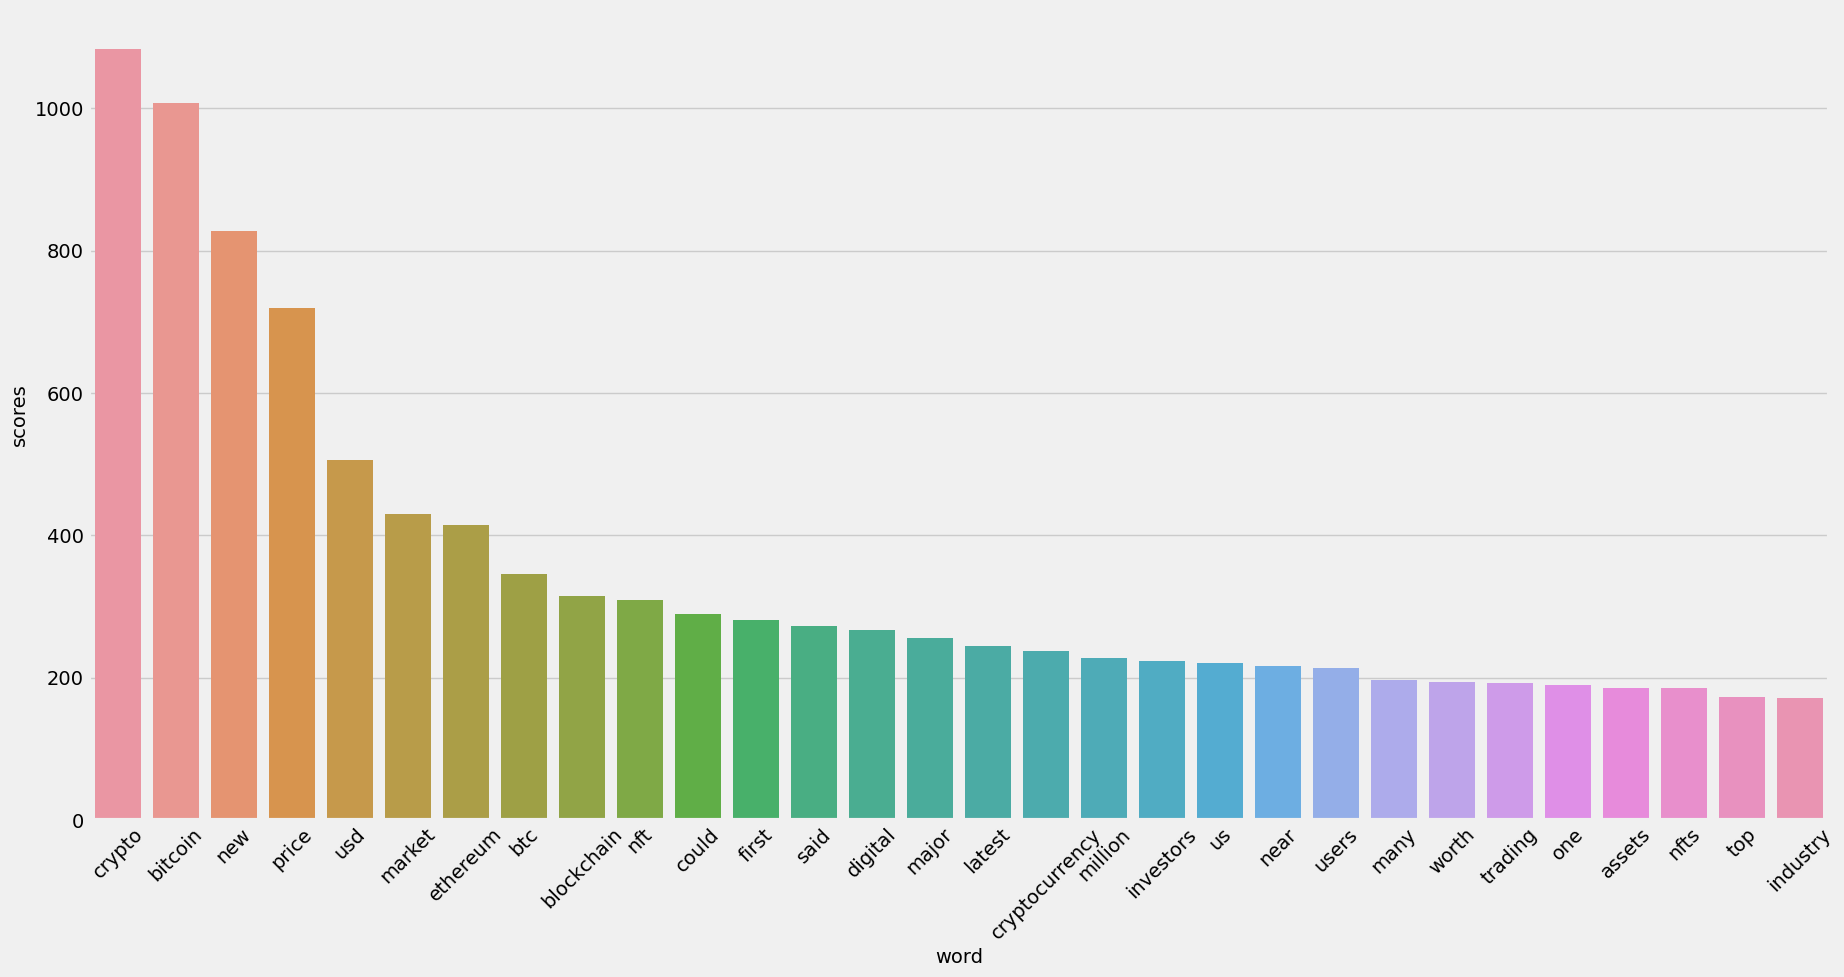

In [27]:
pos_df = pd.DataFrame(most_common_pos_text.items(),columns=['word', 'scores'])
plt.figure(figsize = (20,10))
sns.barplot(x='word', y= 'scores', data=pos_df)
plt.xticks(rotation=45)
plt.show()

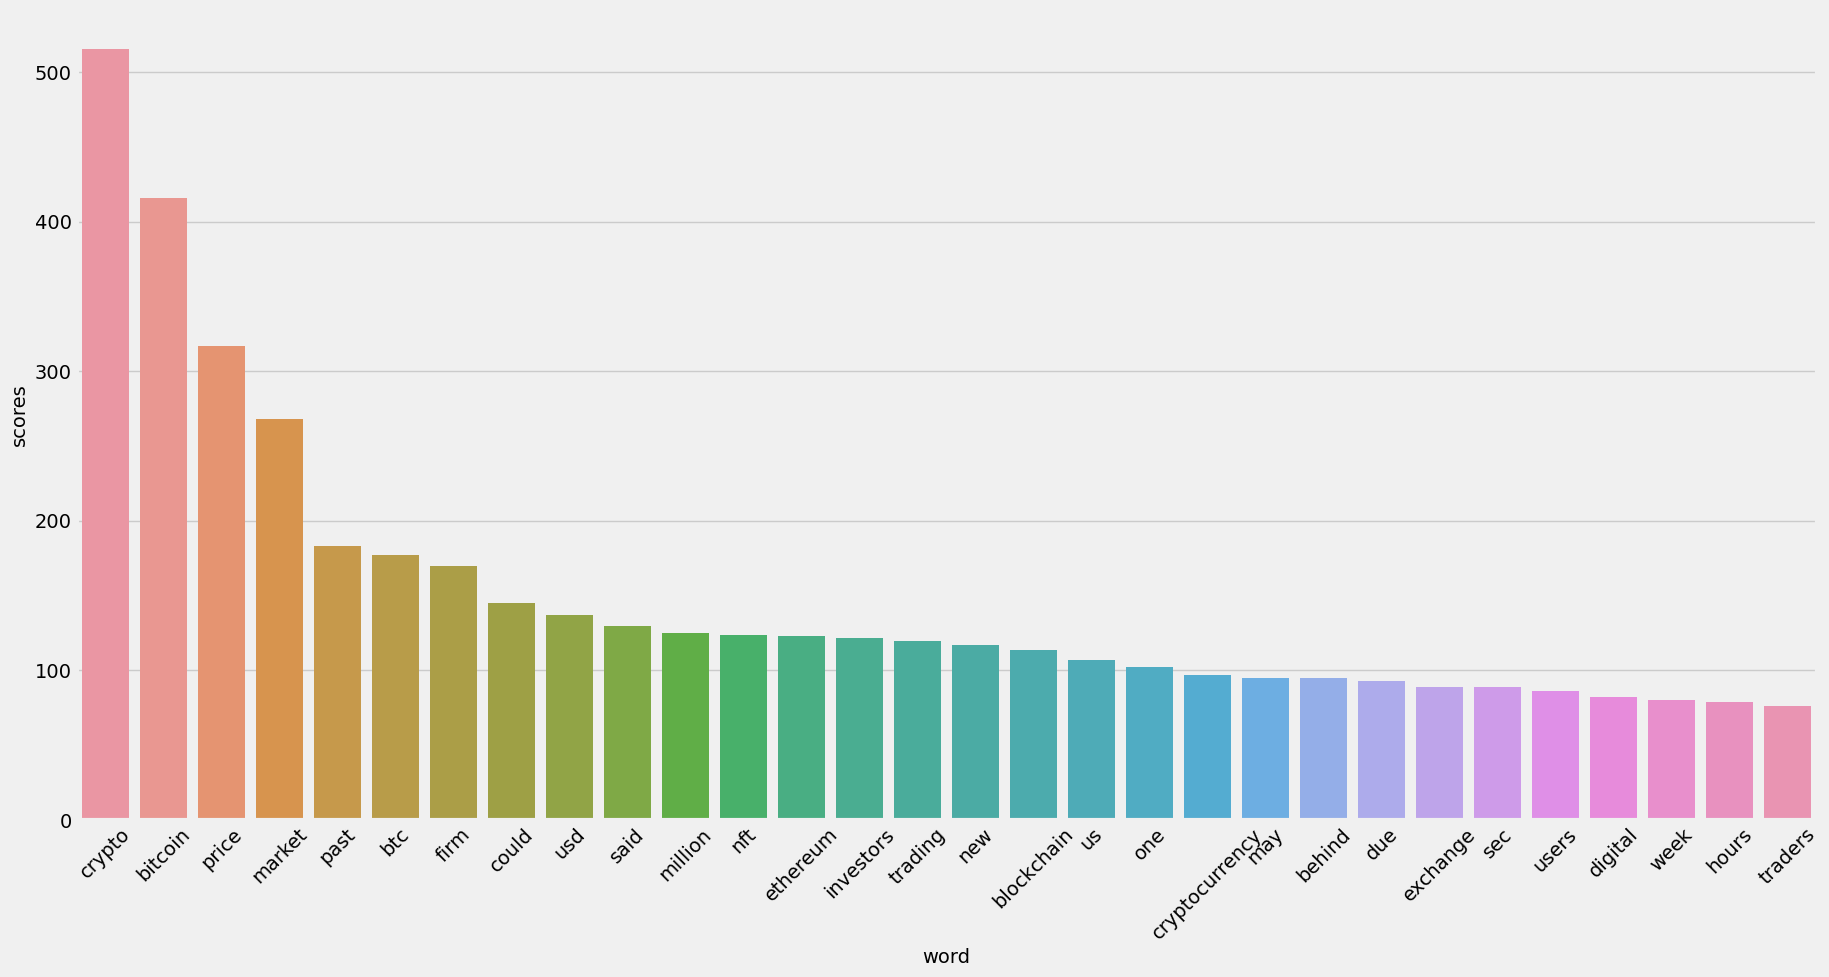

In [28]:
neg_df = pd.DataFrame(most_common_neg_text.items(),columns=['word', 'scores'])
plt.figure(figsize = (20,10))
sns.barplot(x='word', y= 'scores', data=neg_df)
plt.xticks(rotation=45)
plt.show()

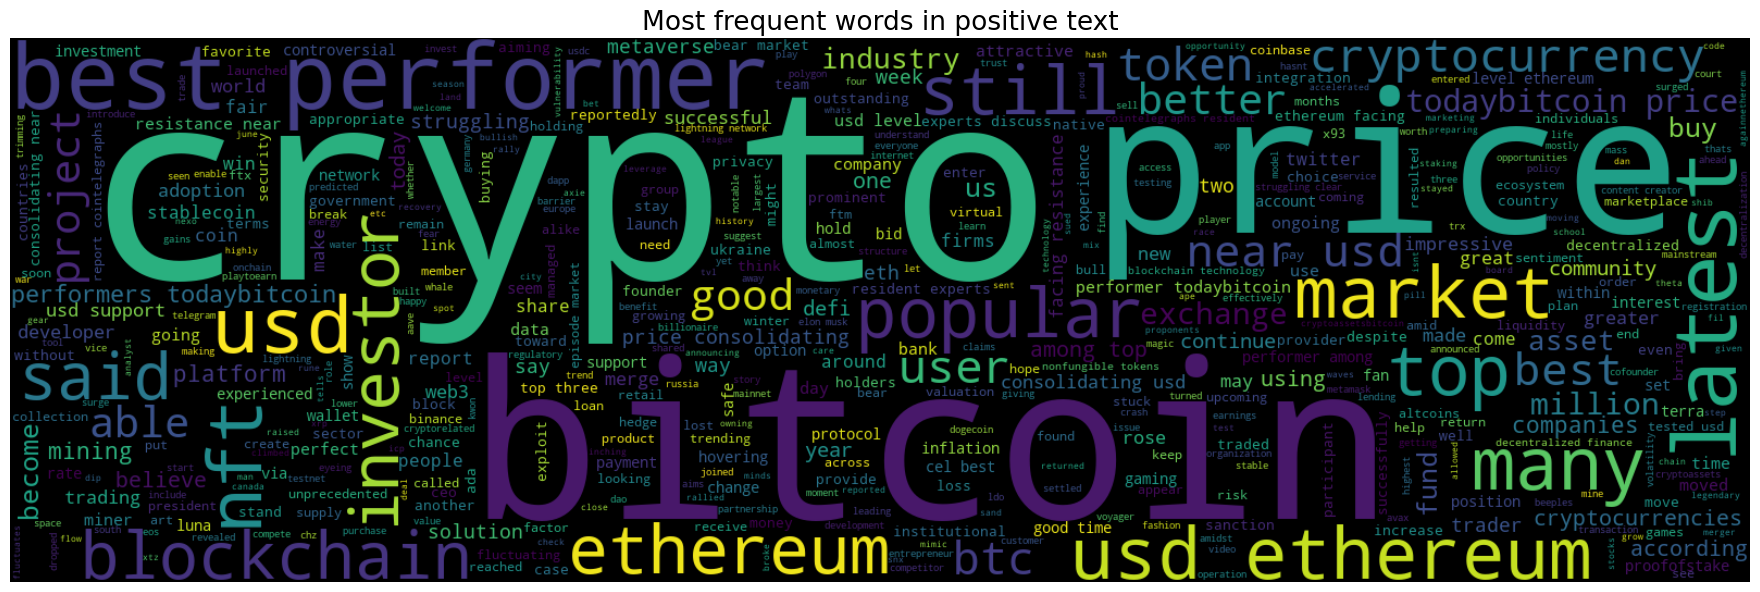

In [29]:
from wordcloud import WordCloud # for creating word visualization
pos_text = df[df.sentiment == 'Positive']
pos_text = pos_text.sort_values(['polarity'], ascending = False)[:500]

text_cont = ''.join([word for word in pos_text['clean_text']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width =1600, height=500).generate(text_cont)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive text', fontsize=19)
plt.show()

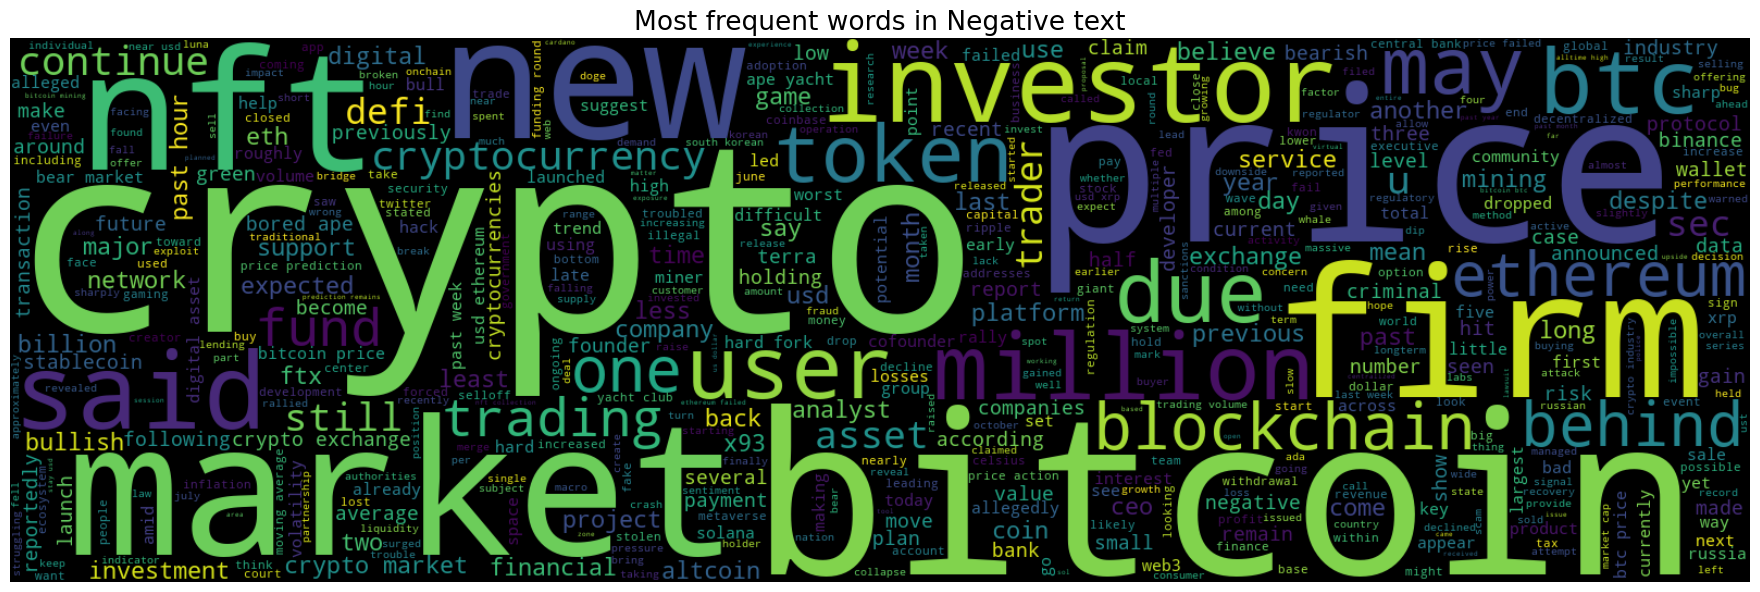

In [30]:
neg_text = df[df.sentiment == 'Negative']
neg_text = neg_text.sort_values(['polarity'], ascending = False)

text_cont = ''.join([word for word in neg_text['clean_text']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width =1600, height=500).generate(text_cont)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative text', fontsize=19)
plt.show()

In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [36]:

text = "'Cryptocurrency businesses in the United Kingdom have been struggling to meet Anti-Money Laundering standards set by the Financial Conduct Authority, according to a senior official.John Glen, a member of U.K. Parliament and the economic secretary to the Treasury, pointed out major difficulties in the process of registering crypto firms under the FCAâ€™s AML regulations in official comments on Friday.According to the official, only five crypto businesses have received registration from the FCA as of May 24 after the authority became the official AML supervisor of the crypto industry in the U.K. in January 2020.â€œOf the firms assessed to date over 90% have withdrawn their application following FCA intervention. There are 167 crypto asset businesses with outstanding applications,â€ Glen noted. He added that 77 new crypto firms have applications pending full assessment.The secretary mentioned that the FCA was also not able to process and register all applications by its previous deadline due to a significant number of firms failing to adopt robust AML control frameworks as well as employ proper staff. As such, the FCA established a â€œTemporary Registration Regimeâ€ allowing crypto companies to continue trading until July 9 pending a decision.Glen also stated that Her Majestyâ€™s Treasury has been in regular contact with the FCA as well as industry associations, firms and consumer organizations regarding concerns over the range of financial services related to crypto. He noted that HM Treasury published a consultation on the broader regulatory framework of crypto with a focus on stablecoins in January:The FCA has been expanding its regulatory oversight of the crypto industry this year. In March, the authority announced its plans to require crypto firms to submit yearly financial crimes reports. Previously, the financial watchdog prohibited U.K. firms from offering crypto derivatives products including futures and exchange-traded notes to retail customers. The CEO of Ark Investment Management, Cathie Wood, believes the controversial Tesla CEO and Dogecoin proponent, Elon Musk, will again embrace Bitcoin once greater adoption of renewable energy has occurred within the mining sector.Despite relations between Musk and the Bitcoin community souring, Wood predicted: â€œElon will come back and be part of [the Bitcoin] ecosystem.â€Woodâ€™s comments come on the same day that Arkâ€™s Sam Korus published an update the firmâ€™s â€œopen-source Solar+Battery+Bitcoin mining modelâ€ to allow historic testing of the systemâ€™s efficacy.Korus concluded: â€œThe takeaway is that regardless of a Bitcoin bull of bear market, Bitcoin mining can incentivize additional solar and battery installations,â€ adding:Musk replied to the post, noting that while such a system could be achieved over time, the recent â€œextremeâ€ growth in Bitcoinâ€™s hash rate could not have been supported by renewables.He advocated for the top 10 mining pools by hash rate to post audited breakdowns of their energy sources.Can you post audited numbers of renewable energy vs not of your private jets?With Wood anticipating renewables will soon represent a larger share of the energy fueling the mining sector, the Ark Invest founder is steadfast in her predictions of $500,000 BTC for the future despite the recent crash that saw prices tumble more than 50% over the course of two weeks.Wood characterized the markets as having entered a â€œcapitulation phase,â€ asserting it is â€œa really great time to buyâ€ despite acknowledging: â€œYou never know how low is low when a market gets very emotional.â€Wood is putting her money where her mouth is too, with Ark Invest accumulating shares in Coinbase while the stock has been trading below its direct listing reference price of $250.The crypto downturn accelerated with Tesla CEO Elon Muskâ€™s apparent u-turn on Bitcon, with Musk criticizing the environmental impacts of Bitcoin mining.Wood also believes the heavy market retracement improves the prospects of U.S. regulators approving a Bitcoin exchange-traded fund, or ETF, stating: â€œThe odds are going up now that we have had this correction.'"
doc = nlp(text)

In [37]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

Another Wordcount
- Considering the the "subject" in our dataset

In [42]:
from collections import Counter
text_count = Counter()
for text in df['subject']:
    for word in text.split():
        text_count[word] += 1

list_df = pd.DataFrame.from_dict(text_count, orient = 'index').reset_index()
list_df.columns = ['Subject', 'Count']
list_df.sort_values(by = 'Count', ascending = False, inplace = True)

list_df.head(20)

,Subject,Count
1,bitcoin,4821
2,altcoin,3197
0,blockchain,2168
4,ethereum,1177
5,nft,911
3,defi,476


In [43]:
list_df['Percentage'] = (list_df['Count']/list_df['Count'].sum()*100)
list_df.head()

,Subject,Count,Percentage
1,bitcoin,4821,37.811765
2,altcoin,3197,25.074510
0,blockchain,2168,17.003922
4,ethereum,1177,9.231373
5,nft,911,7.145098


In [48]:
df.head()

,date,source,subject,text,headline,link,month,clean_text,polarity,sentiment
0,2022-11-15 11:00:00,CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...,11,roster full entertainment industry notables ae...,0.175000,Positive
1,2022-11-15 10:55:00,CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...,11,blockchain analytics firm nansen released over...,-0.068750,Negative
2,2022-11-15 10:32:00,CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...,11,hardware wallet firm certain latest uptick dem...,0.049405,Positive
3,2022-11-15 09:56:00,CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...,11,kyle davies founder collapsed crypto fund thre...,0.000000,Neutral
4,2022-11-15 09:46:00,CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...,11,despite ongoing crypto market downturn intensi...,0.127381,Positive


Let's check the source of the news article

Text(0.5, 1.0, 'News Source Count')

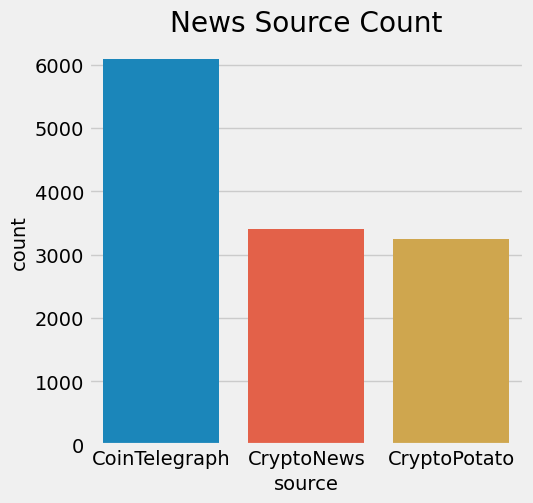

In [49]:
fig = plt.figure(figsize= (5,5))
sns.countplot(x = 'source', data = df)
plt.title('News Source Count')

## Congratulation for reading through

- Before you leave, if you have any question kindly feel free to ask.

I will love to connect with you, kindly follow me on my social media platforms.

[LinkedIn](https://linkedin.com/in/ndubuisi-precious) <br>
[Twitter](https://twitter.com/ndubuisiprecious) <br>
[Twitter](https://twitter.com/priscapenz) For content on Web 3.0, NFTs, Defi follow<br>
[Github](https://github.com/ndubuisi-precious) <br>
[Sentiment Analysis on Medium](https://t.co/1sIN9bcsoT)<br>
[Shield Agency](https://shieldagency.ng) we help your business grow
